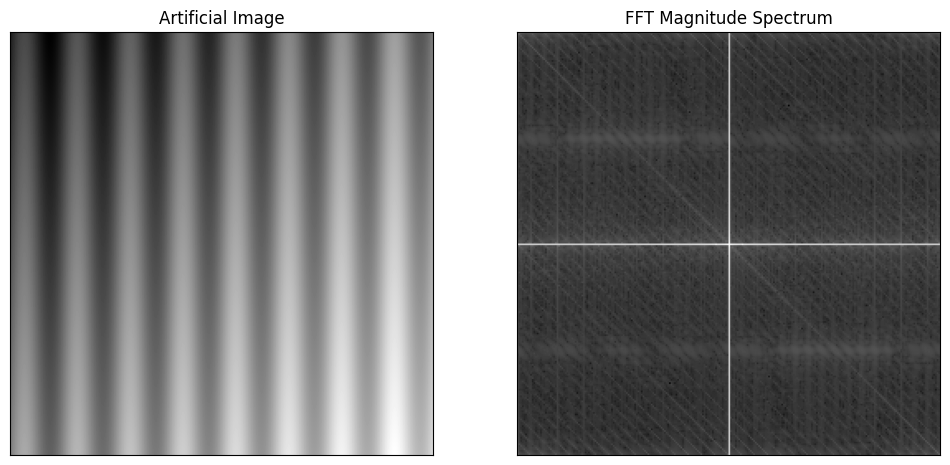

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Create artificial image: diagonal gradient + periodic pattern
image = np.zeros((256, 256), dtype=np.float32)
for i in range(256):
    for j in range(256):
        # Create gradient component
        image[i,j] = 0.5 * (i + j) / 255  
        # Add periodic component (vertical stripes)
        image[i,j] += 0.2 * np.sin(2 * np.pi * j / 32)
        
# Compute FFT and shift zero frequency to center
fft = np.fft.fft2(image)
fft_shift = np.fft.fftshift(fft)
magnitude = 20 * np.log(np.abs(fft_shift))

# Visualization
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Artificial Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(magnitude, cmap='gray')
plt.title('FFT Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


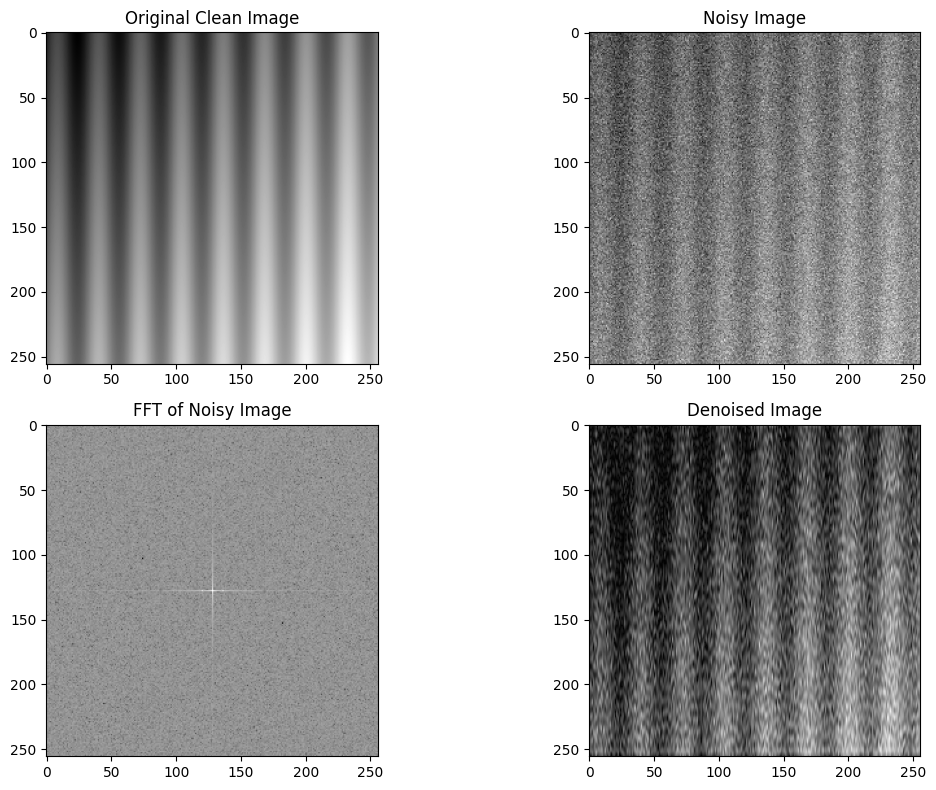

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create clean artificial image
image = np.zeros((256, 256))
for i in range(256):
    for j in range(256):
        # Diagonal gradient + vertical stripes
        image[i,j] = 0.5*(i + j)/255  # Gradient
        image[i,j] += 0.2*np.sin(2*np.pi*j/32)  # Stripes

# Add random noise
noisy_image = image + 0.3*np.random.normal(size=image.shape)

# Denoising with FFT
fft = np.fft.fft2(noisy_image)  # Compute FFT
fft_shift = np.fft.fftshift(fft)  # Center frequencies

# Create a mask to filter out high frequencies
rows, cols = noisy_image.shape
crow, ccol = rows//2, cols//2
mask = np.zeros((rows, cols))
mask[crow-30:crow+30, :] = 1  # Keep only center horizontal band

# Apply mask and inverse FFT
fft_shift_filtered = fft_shift * mask
fft_filtered = np.fft.ifftshift(fft_shift_filtered)
denoised_image = np.abs(np.fft.ifft2(fft_filtered))

# Visualization
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Clean Image')

plt.subplot(2, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')

plt.subplot(2, 2, 3)
plt.imshow(20*np.log(np.abs(fft_shift)), cmap='gray')
plt.title('FFT of Noisy Image')

plt.subplot(2, 2, 4)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image')

plt.tight_layout()
plt.show()
